# Practice Assignment

Instructions
For all the questions below (practice and graded), use dataset from following link: 'https://drive.google.com/file/d/1lvvHj0v9LKwe6XUezgpIUY_c0HdJUcCb/view?usp=sharing'



In [39]:
# Loading the given dataset
import pandas as pd
import numpy as np
data = pd.read_csv('MLP_Wk2_Dataset.csv')
data = data.replace('?',np.nan)
data.iloc[:,:4] = data.iloc[:,:4].astype(float)

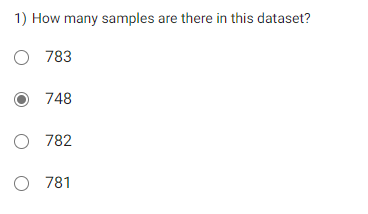

In [40]:
data.shape[0]

748

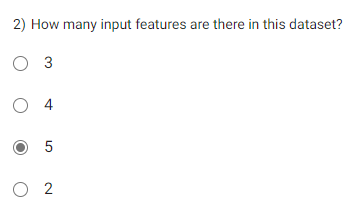

In [41]:
data.shape[1]-1 
# minus one for excluding target variable

5

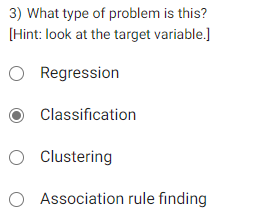

In [42]:
data['Target'].value_counts()
# classification problem since the target is a binary value and not real valued

NO     570
YES    178
Name: Target, dtype: int64

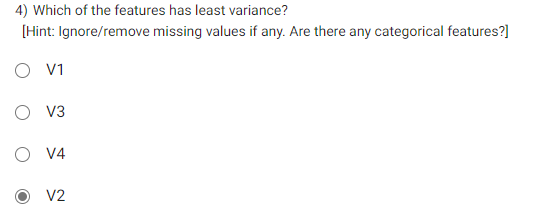

In [43]:
t = round(data.dropna().var(),3)
print(t.idxmin())

V2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


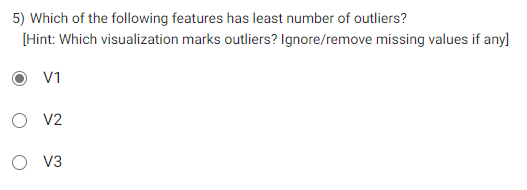

In [60]:
Q1 = data.quantile(0.25)*1.5
Q3 = data.quantile(0.75)*1.5
IQR = Q3-Q1
t = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


Target     0
V1         2
V2        14
V3        15
V4         0
V5         0
dtype: int64

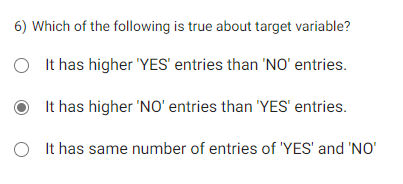

In [65]:
data['Target'].value_counts()

NO     570
YES    178
Name: Target, dtype: int64

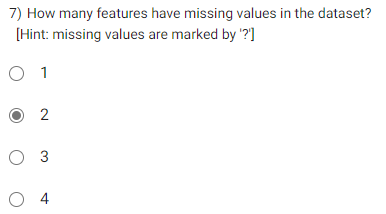

In [70]:
data = pd.read_csv('MLP_Wk2_Dataset.csv')
t = data.replace('?',np.nan).isna().sum()
len(t[t>0])

2

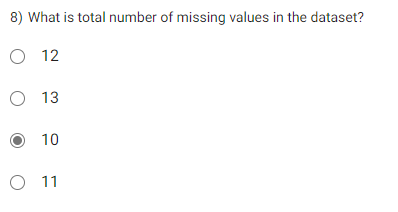

In [71]:
data.replace('?',np.nan).isna().sum().sum()

10

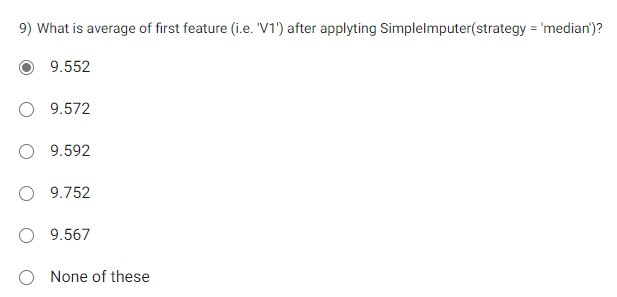

In [76]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
t = si.fit_transform(data.replace('?',np.nan).iloc[:,:4])
t[:,0].mean()

9.552139037433156

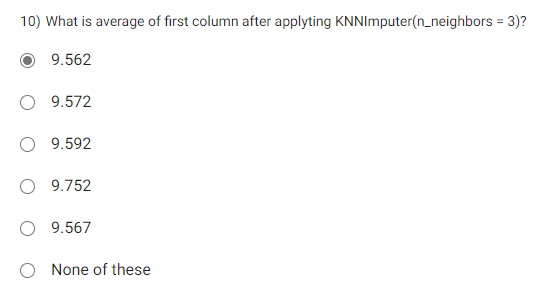

In [110]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)
t = knn.fit_transform(np.array(data.replace('?',np.nan)['V1']).reshape(-1,1))
data_knn = knn.fit_transform(t)
data_knn.mean()

9.562584118438762

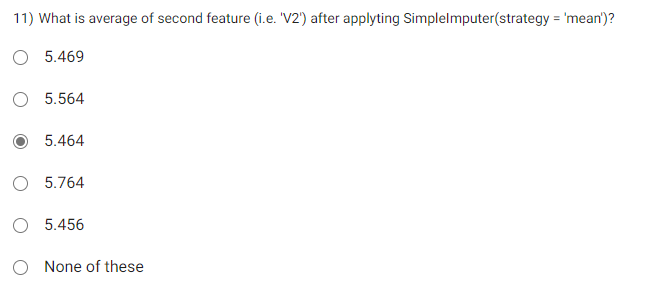

In [117]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')
si.fit_transform(data.replace('?',np.nan).iloc[:,:4])[:,1].mean()

5.464333781965007

 # Graded Assignment

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('MLP_Wk2_Dataset.csv')
data = data.replace('?',np.nan)
X,y = data.iloc[:,:5],data['Target']

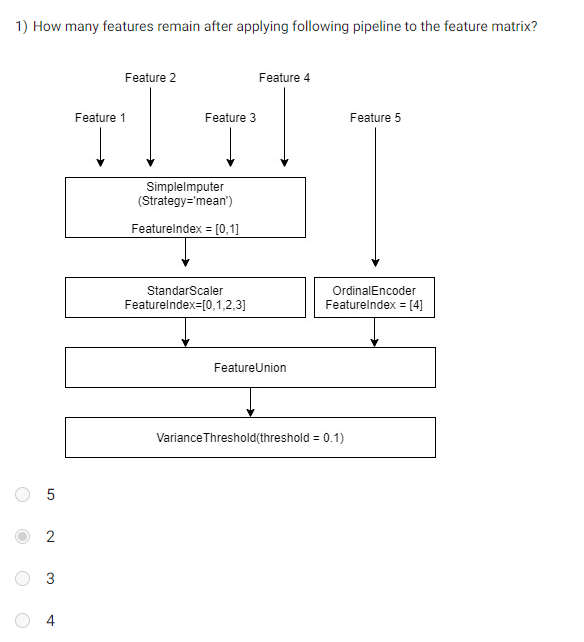

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.feature_selection import VarianceThreshold

num = Pipeline([
                ('select',ColumnTransformer([('select_four','passthrough',slice(0,4),)]) ),
                ('imputer',SimpleImputer(strategy='mean')),
                ('std_scaler',StandardScaler()),
                ])
cat = ColumnTransformer([('ordinal_encoder',OrdinalEncoder(),[4]),])

union = FeatureUnion(transformer_list=[
                                       ('num_trans',num),
                                       ('cat_trans',cat),
                                       ])
final = Pipeline([('transformations',union),
                  ('var_thresh',VarianceThreshold(0.1))])

In [4]:
from sklearn import set_config
set_config(display='diagram')
final

Pipeline(steps=[('transformations',
                 FeatureUnion(transformer_list=[('num_trans',
                                                 Pipeline(steps=[('select',
                                                                  ColumnTransformer(transformers=[('select_four',
                                                                                                   'passthrough',
                                                                                                   slice(0, 4, None))])),
                                                                 ('imputer',
                                                                  SimpleImputer()),
                                                                 ('std_scaler',
                                                                  StandardScaler())])),
                                                ('cat_trans',
                                                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                                                  OrdinalEncoder(),
                                                                                  [4])]))])),
                ('var_thresh', VarianceThreshold(threshold=0.1))])

In [5]:
d = final.fit_transform(X)
d.shape

(748, 4)

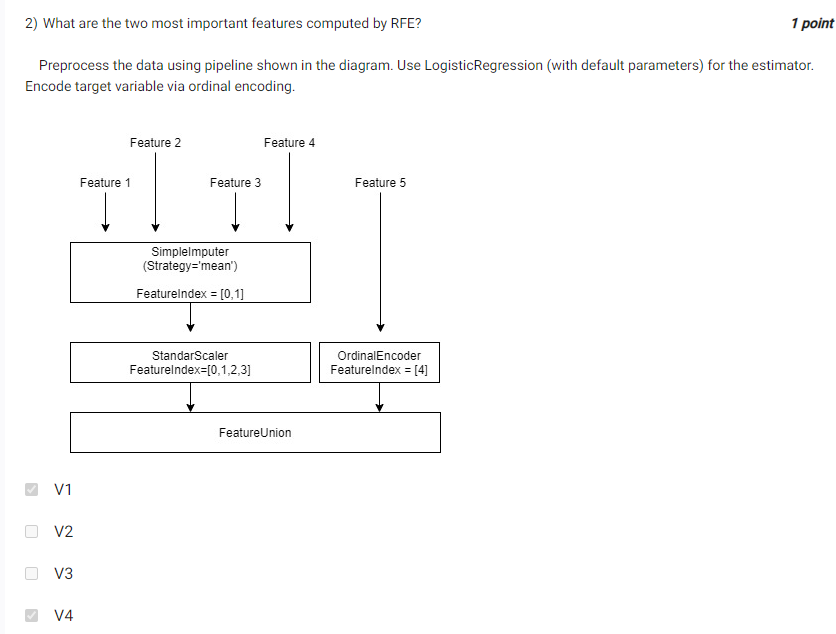

In [14]:
num = Pipeline([('select4',ColumnTransformer([('selector','passthrough',slice(0,4))])),
                ('imputer',SimpleImputer(strategy='mean')),
                ('std_scaler',StandardScaler())])
cat = ColumnTransformer([('ord_encoder',OrdinalEncoder(),[4])])
full_pipe = FeatureUnion([('num',num),
                          ('cat',cat)])
final = Pipeline([('full_pipe',full_pipe)])

In [16]:
from sklearn import set_config
set_config(display='diagram')
final

Pipeline(steps=[('full_pipe',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('select4',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   slice(0, 4, None))])),
                                                                 ('imputer',
                                                                  SimpleImputer()),
                                                                 ('std_scaler',
                                                                  StandardScaler())])),
                                                ('cat',
                                                 ColumnTransformer(transformers=[('ord_encoder',
                                                                                  OrdinalEncoder(),
                                                                                  [4])]))]))])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
rfe = RFE(LogisticRegression(),n_features_to_select=2,step=1)
a = rfe.fit(final.fit_transform(X),y)

In [25]:
a.ranking_

array([1, 3, 1, 2, 4])

In [23]:
a.support_

array([ True, False,  True, False, False])

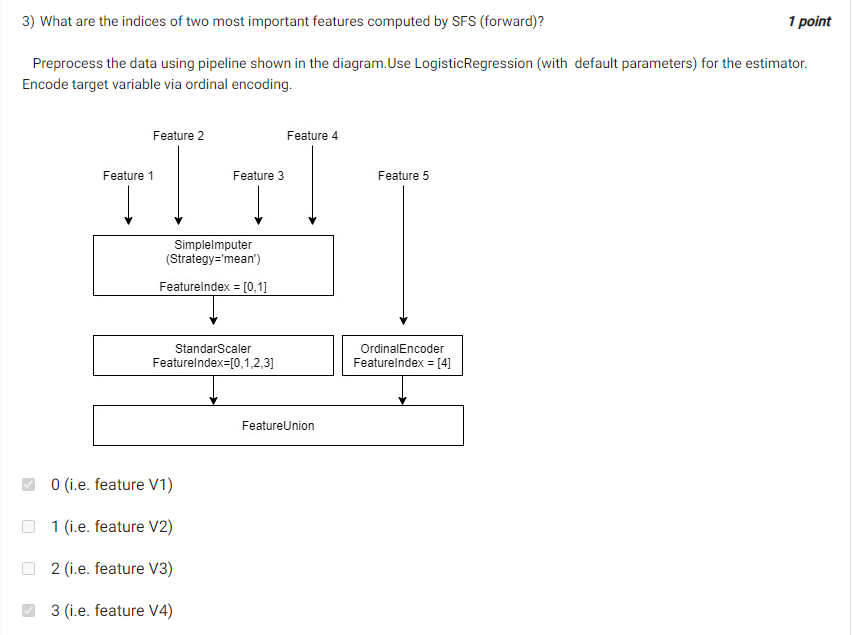

In [26]:
num = Pipeline([('select4',ColumnTransformer([('selector','passthrough',slice(0,4))])),
                ('imputer',SimpleImputer(strategy='mean')),
                ('std_scaler',StandardScaler())])
cat = ColumnTransformer([('ord_encoder',OrdinalEncoder(),[4])])
full_pipe = FeatureUnion([('num',num),
                          ('cat',cat)])
final = Pipeline([('full_pipe',full_pipe)])

In [34]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
sfs = SequentialFeatureSelector(LogisticRegression(),n_features_to_select=2)
sfs.fit(final.fit_transform(X),y)
print(sfs.support_)

[False  True False  True False]


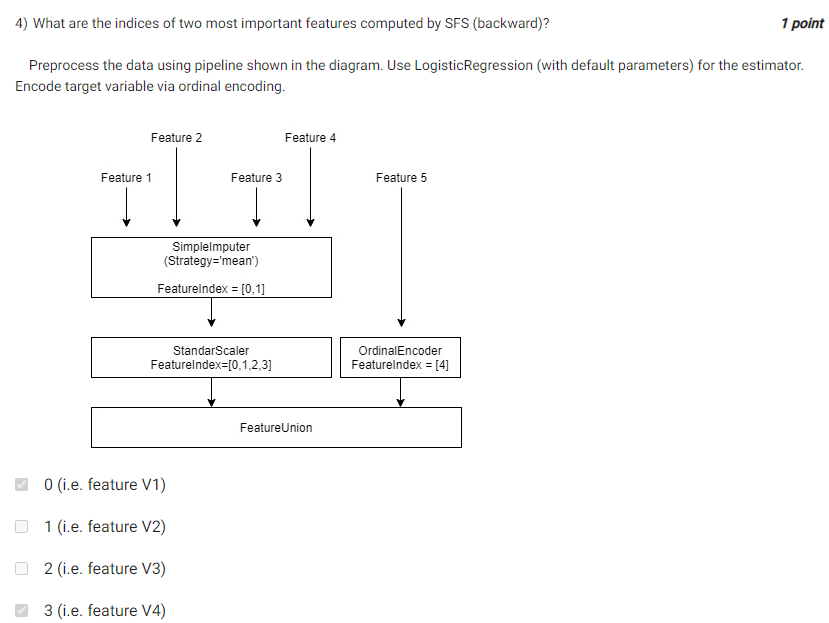

In [35]:
sfs_back = SequentialFeatureSelector(LogisticRegression(),n_features_to_select=2,direction='backward')
sfs_back.fit(final.fit_transform(X),y)
sfs_back.support_

array([False, False,  True,  True, False])